# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 3 -  Aprendizaje Supervisado

# Introducción

Una tarea fundamental en el modelado financiero es la predicción del comportamiento de los precios en un futuro cercano. Usando la serie de precios histórica de los activos como datos de entrenamiento, deseamos predecir si el precio subirá o no, y en qué medida, es decir, nos interesa también el rendimiento.

La predicción de retornos de criptoactivos es un gran desafío para la comunidad de aprendizaje automático debido a la alta volatilidad de los activos, la manipulación del mercado y la naturaleza no estacionaria de los datos, entre otras cuestiones.  

En este práctico aplicaremos algunas técnicas de aprendizaje automático supervisado para predecir el movimiento de activos, a partir de los features que hemos trabajado en el práctico anterior. Exploraremos modelos simples de regresión y clasificación. Para validar los modelos procedemos a evaluar su bondad de ajuste, es decir, que "tan bueno" es el poder predictivo del modelo y comparar su desempeño.

📌 **Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

¡Los invito a indagar sobre estas metodologías!


📌 **Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos calculados en el trabajo práctico anterior y algunos que sumaremos al análisis, pero estos pueden ser muy diversos, como datos de sentimiento, datos de amplitud, datos básicos, gubernamentales, etc., que nos ayudarán a hacer nuestras predicciones. 



📌 **Modelo Baseline**

Establecer un baseline es esencial para cualquier problema de predicción. Este modelo nos brinda un punto de comparación, nos da una idea de cuan bien otros modelos rindieron en el problema en cuestión.

Si la performance de un modelo no alcanza o es similiar a la del baseline, entonces debemos seguir trabajando para mejorar el modelo u optar por algún otro. Nuestro baseline debe ser fácil de implementar y naive. 


Algunas opciones simples para baseline: [link](https://medium.com/analytics-vidhya/benchmarking-methods-for-deep-learning-based-time-series-forecast-ec45f78b61e2).

# 📖 ¡Actividades!

En este práctico evaluaremos el potencial de modelos predictivos simples sobre algunos activos. Esta será la base para construir una canasta de activos con riesgo controlado. 

**Objetivo: predecir el movimiento del precio de cada activo para los próximos n días (tomaremos n=1, n=7)**

## Parte 0 - Feature Engineer

Los invito a explorar y agregar otras características además de las trabajadas anteriormente. Como en el práctico pasado, pueden usar la librería talib o calcularlos ustedes.

- [Indicadores técnicos](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)
- [Indicadores técnicos en python](https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb)

## Parte I - Clasificación

Por ahora nos concentraremos en predecir si el precio del activo subirá o bajará (es decir, si el retorno a n días será positivo o negativo). Para ello entrenaremos algunos modelos de clasificación.

- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier

En este caso, podemos definir nuestro target como 1 o 0:

- Si el rendimiento a n días fue positivo el target tomará el valor 1.
- Si el rendimiento a n días fue negativo o cero el target tomará el valor 0.

Utilicen métricas adecuadas para la evaluación de los modelos (accuracy, recall, precision, etc) 


## Parte II - Regresión

Ahora nuestro objetivo es implementar modelos sobre los activos para predecir su tasa de cambio (ya sea respecto al precio open o close). Consideren los modelos de regresión:

- Desicion tree
- Randon Forest
- XGBoost


Evalúen los resultados, con algunas métricas útiles, tales como Error Cuadrático Medio (RMSE) y el Error Absoluto Medio (MAE). ¿Qué pueden decir?


### ¡Para tener en cuenta!

- Para los modelos de regresión y clasificación elijan un modelo baseline.
- Definir periodos de entrenamiento y test: utilizar librerías adecuadas para series de tiempo.
- Dado el periodo de entrenamiento, chequeen si los datos están balaceados.  
- Analicen la necesidad de estandarizar los datos, según los modelos empleados.
- Ajuste de hiperparámetros de los modelos: dado que los parámetros pueden tomar valores en un amplio rango es recomendable uilizar GridSearchCV. 



## Opcional - Predicción usando Long short-term memory (LSTM)

Las redes de este tipo son adecuadas para clasificar, procesar y hacer predicciones basadas en datos de series temporales, ya que pueden almacenar información pasada. Esto es importante en nuestro caso porque el precio anterior de una acción es crucial para predecir su precio futuro.

Comparen la performance de los modelos anteriores (regresión y/o clasificación) con una red neuronal recurrente (LSTM). 

# Fecha de entrega

- __Versión preliminar: 29/7__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

# Resolución

## Inicialización


### Importar librerías

In [31]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import datetime
import time
import os
import talib as ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import itertools

### Cargar datasets

In [2]:
pairs = ["AAVEUSDT", "ADAUSDT", "AXSUSDT", "BCHUSDT", "BNBUSDT", "BTCUSDT", "COMPUSDT", "DASHUSDT", 
          "DOGEUSDT", "DOTUSDT", "EOSUSDT", "ETCUSDT", "ETHUSDT", "LINKUSDT", "LTCUSDT", "LUNAUSDT", "NEOUSDT", "XMRUSDT", "XRPUSDT"]
interesting_pairs = ["BTCUSDT", "ETHUSDT", "ADAUSDT"]

def add_pair_to_dictionary(dictionary, pair):
  dictionary[pair] = pd.read_csv(f"https://raw.githubusercontent.com/joaquinvvelaco/diplo-datos-2022/main/mentoria/entregables/ayc/output/{pair}_features.csv", index_col=0, parse_dates=True, dayfirst= True)

def get_dataframes():
  dataframes = dict()
  
  for pair in pairs:
    add_pair_to_dictionary(dataframes, pair)
    
  return dataframes

raw_dataframes = get_dataframes() # No agregar columnas en estos dataframes. La idea es mantener los dataframes originales.
dataframes = raw_dataframes.copy() # Cualquier modificación de algún dataframe, realizarlo en estos.
sample_dataframe = dataframes["BTCUSDT"]

In [3]:
print(len(pairs))

19


## Funciones
Definimos un conjunto de funciones comunes para todos los ejercicios.

### Funciones compuestas

In [4]:
def do(func, *args):
  for pair in pairs:
    func(pair, *args)  


def do_interesting(func, *args):
  for pair in interesting_pairs:
    func(pair, *args)

### Funciones para graficar

In [5]:
def plot_multiple_temporal_serie(dataframe, variables, title, xlabel, ylabel, legends=None, together=False):
  if(not together):
    plt.figure(figsize=(20, 6))

  for variable in variables:
    seaborn.lineplot(x=dataframe.index, y=variable, data=dataframe)

  plt.suptitle(f"{title}")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  if(legends != None):
    plt.legend(title='Serie', loc='upper left', labels=legends)

def plot_temporal_serie(dataframe, variable, together=False, title=None, with_trendline=False, add=None):
  if(not together):
    plt.figure(figsize=(20, 6))
  
  if(title==None):
    title = f"Serie temporal"
  
  seaborn.lineplot(x=dataframe.index, y=variable, data=dataframe).set(
      xlabel="Fecha", 
      ylabel=variable,
      title=title
  )
  if(with_trendline):
    seaborn.regplot(x=dataframe.index.map(pd.Timestamp.toordinal), y=variable, data=dataframe, ci=None)
  
  if(add!=None):
    seaborn.lineplot(x=dataframe.index, y=add, data=dataframe)

## Parte 0

### Nuevas features

In [6]:
def add_bollinger_bands(pair):
    dataframe = dataframes[pair]
    ma_15 = dataframe['close'].transform(lambda x: x.rolling(window=15).mean())
    sd_15 = dataframe['close'].transform(lambda x: x.rolling(window=15).std())
    dataframe['upperband'] = ma_15 + 2*sd_15
    dataframe['lowerband'] = ma_15 - 2*sd_15

do(add_bollinger_bands)

In [7]:
dataframes["BTCUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 2019-01-01 00:00:00 to 2022-05-05 12:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  7307 non-null   float64
 1   high                  7307 non-null   float64
 2   low                   7307 non-null   float64
 3   close                 7307 non-null   float64
 4   volume                7307 non-null   float64
 5   exchange_rate_open    7306 non-null   float64
 6   exchange_rate_high    7306 non-null   float64
 7   exchange_rate_low     7306 non-null   float64
 8   exchange_rate_close   7306 non-null   float64
 9   exchange_rate_volume  7306 non-null   float64
 10  moving_average_close  7140 non-null   float64
 11  rsi                   7293 non-null   float64
 12  adx                   7280 non-null   float64
 13  macd                  7274 non-null   float64
 14  macd_signal           7274 non-null 

In [8]:
dataframes["BTCUSDT"].corr()

,open,high,low,close,volume,exchange_rate_open,exchange_rate_high,exchange_rate_low,exchange_rate_close,exchange_rate_volume,moving_average_close,rsi,adx,macd,macd_signal,macd_hist,upperband,lowerband
open,1.000000,0.999831,0.999725,0.999698,0.062878,0.000364,-0.011485,-0.010507,-0.019566,-0.030899,0.982495,-0.020033,-0.047145,0.064815,0.069938,-0.003736,0.997958,0.998037
high,0.999831,1.000000,0.999652,0.999854,0.069246,-0.000062,-0.001538,-0.005624,-0.008622,-0.027510,0.982541,-0.017420,-0.045352,0.063890,0.068460,-0.002165,0.998078,0.997750
low,0.999725,0.999652,1.000000,0.999811,0.051960,0.002256,-0.004717,0.003017,-0.006961,-0.036520,0.982011,-0.014525,-0.049471,0.068120,0.071604,0.002074,0.997286,0.997876
close,0.999698,0.999854,0.999811,1.000000,0.061569,0.000306,-0.000110,0.000603,0.000338,-0.031850,0.982186,-0.013795,-0.047027,0.066348,0.070160,0.000702,0.997705,0.997771
volume,0.062878,0.069246,0.051960,0.061569,1.000000,-0.050263,0.122354,-0.222693,-0.032738,0.398095,0.050111,0.007569,0.231906,-0.051749,-0.035785,-0.060365,0.080039,0.048582
exchange_rate_open,0.000364,-0.000062,0.002256,0.000306,-0.050263,1.000000,0.441933,0.376946,-0.002451,-0.010617,-0.021608,0.306315,0.005442,0.097349,0.028358,0.236613,-0.016347,-0.017066
exchange_rate_high,-0.011485,-0.001538,-0.004717,-0.000110,0.122354,0.441933,1.000000,0.342489,0.586094,0.380896,-0.023366,0.335614,-0.001642,0.078703,0.021493,0.195816,-0.019102,-0.018022
exchange_rate_low,-0.010507,-0.005624,0.003017,0.000603,-0.222693,0.376946,0.342489,1.000000,0.574201,-0.386301,-0.018055,0.278079,0.015952,0.050293,0.005214,0.152044,-0.013860,-0.016695
exchange_rate_close,-0.019566,-0.008622,-0.006961,0.000338,-0.032738,-0.002451,0.586094,0.574201,1.000000,-0.011225,-0.021777,0.328307,0.006773,0.052752,0.009658,0.146247,-0.017625,-0.018460
exchange_rate_volume,-0.030899,-0.027510,-0.036520,-0.031850,0.398095,-0.010617,0.380896,-0.386301,-0.011225,1.000000,-0.028822,-0.001316,-0.008049,-0.003131,-0.001615,-0.005389,-0.032145,-0.029504


## Parte 1

### Preprocesamiento

In [9]:
sample_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 2019-01-01 00:00:00 to 2022-05-05 12:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  7307 non-null   float64
 1   high                  7307 non-null   float64
 2   low                   7307 non-null   float64
 3   close                 7307 non-null   float64
 4   volume                7307 non-null   float64
 5   exchange_rate_open    7306 non-null   float64
 6   exchange_rate_high    7306 non-null   float64
 7   exchange_rate_low     7306 non-null   float64
 8   exchange_rate_close   7306 non-null   float64
 9   exchange_rate_volume  7306 non-null   float64
 10  moving_average_close  7140 non-null   float64
 11  rsi                   7293 non-null   float64
 12  adx                   7280 non-null   float64
 13  macd                  7274 non-null   float64
 14  macd_signal           7274 non-null 

Nos quedamos con el último intervalo autocorrelacionado

In [10]:
def cut_serie(pair, n):
    dataframe = dataframes[pair]
    dataframes[pair] = dataframe.tail(n)


do(cut_serie, 600*3) #últimos 300 dias


Al momento de generar las features, se agregaron valores NaN a cada dataframe. Esto se debe a que el cálculo de la mayoría de las features son móviles, por lo que no es posible calcularlos para los primeros valores de las series. A partir de esto, y considerando que en el análisis exploratorio identifiamos que no existía un comportamiento estacional en las series, decidimos "dropear" los primeros valores de las series. 

In [11]:
def drop_na(pair):
    dataframes[pair] = dataframes[pair].dropna()

do(drop_na)

In [12]:
dataframes["AAVEUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2021-07-09 08:00:00 to 2022-05-05 12:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  1800 non-null   float64
 1   high                  1800 non-null   float64
 2   low                   1800 non-null   float64
 3   close                 1800 non-null   float64
 4   volume                1800 non-null   float64
 5   exchange_rate_open    1800 non-null   float64
 6   exchange_rate_high    1800 non-null   float64
 7   exchange_rate_low     1800 non-null   float64
 8   exchange_rate_close   1800 non-null   float64
 9   exchange_rate_volume  1800 non-null   float64
 10  moving_average_close  1800 non-null   float64
 11  rsi                   1800 non-null   float64
 12  adx                   1800 non-null   float64
 13  macd                  1800 non-null   float64
 14  macd_signal           1800 non-null 

In [13]:
dataframe = dataframes["BTCUSDT"]

dataframe_offset = dataframe.shift(-1)

print(dataframe.close.tail())
print("\n")
print(dataframe_offset.close.tail().fillna(method="ffill"))


(dataframe.close.tail()<dataframe_offset.close.tail().fillna(method="ffill")).astype(int)

date
2022-05-04 20:00:00    39773.33
2022-05-05 00:00:00    39549.28
2022-05-05 04:00:00    39513.66
2022-05-05 08:00:00    38209.00
2022-05-05 12:00:00    38209.00
Name: close, dtype: float64


date
2022-05-04 20:00:00    39549.28
2022-05-05 00:00:00    39513.66
2022-05-05 04:00:00    38209.00
2022-05-05 08:00:00    38209.00
2022-05-05 12:00:00    38209.00
Name: close, dtype: float64


date
2022-05-04 20:00:00    0
2022-05-05 00:00:00    0
2022-05-05 04:00:00    0
2022-05-05 08:00:00    0
2022-05-05 12:00:00    0
Name: close, dtype: int32

Agregamos la columna target `{column}_will_be_greater_{period}`

In [14]:
dataframes_y = dict()

def build_target_dataframe(pair, column, period):
    dataframe = dataframes[pair]
    dataframe_column_offset = dataframe[column].shift(-period).fillna(method="ffill")
    dataframe_y = pd.DataFrame()
    dataframe_y[f"{column}_will_be_greater_{period}"] = (dataframe[column] < dataframe_column_offset).astype(int)
    dataframes_y[pair] = dataframe_y

    
    
do(build_target_dataframe, "close", 6)


In [15]:
dataframes_y["BTCUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2021-07-09 08:00:00 to 2022-05-05 12:00:00
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   close_will_be_greater_6  1800 non-null   int32
dtypes: int32(1)
memory usage: 21.1 KB


Escalamos los dataframes

In [16]:
def scale(pair, dict):
    dataframe = dataframes[pair]
    dataframe[:] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataframe)

do(scale, dataframes)


In [17]:
dataframes["AAVEUSDT"].tail()

,open,high,low,close,volume,exchange_rate_open,exchange_rate_high,exchange_rate_low,exchange_rate_close,exchange_rate_volume,moving_average_close,rsi,adx,macd,macd_signal,macd_hist,upperband,lowerband
date,,,,,,,,,,,,,,,,,,
2022-05-04 20:00:00,0.126651,0.134189,0.139845,0.142061,0.028679,0.535890,0.572479,0.665674,0.609512,0.027542,0.147944,0.643339,0.371503,0.507112,0.435292,0.645676,0.112296,0.093601
2022-05-05 00:00:00,0.141801,0.133314,0.143030,0.134185,0.019237,0.612473,0.493814,0.647142,0.441376,0.032661,0.146960,0.590726,0.377003,0.523078,0.452662,0.646913,0.119143,0.093391
2022-05-05 04:00:00,0.133317,0.128646,0.140800,0.133883,0.018457,0.437887,0.471069,0.621624,0.496262,0.047824,0.146019,0.588685,0.377748,0.535091,0.469266,0.640858,0.124813,0.093579
2022-05-05 08:00:00,0.133317,0.131272,0.112768,0.103290,0.088331,0.499300,0.514948,0.499910,0.272836,0.232512,0.144936,0.414800,0.343391,0.524910,0.480254,0.596460,0.125019,0.095406
2022-05-05 12:00:00,0.103018,0.131272,0.112768,0.103290,0.088331,0.276094,0.499051,0.632092,0.498495,0.049797,0.143682,0.414800,0.311487,0.516606,0.487173,0.564288,0.125242,0.096478


Separamos en train y test

In [18]:
dataframes_X_train_clas = dict()
dataframes_y_train_clas = dict()
dataframes_X_test_clas = dict()
dataframes_y_test_clas = dict()


def split_train_test_clas(pair):
    tss = TimeSeriesSplit(n_splits = 20)
    for train_index, test_index in tss.split(dataframes[pair]):
        dataframes_X_train_clas[pair], dataframes_X_test_clas[pair] = dataframes[pair].iloc[train_index, :], dataframes[pair].iloc[test_index,:]
        dataframes_y_train_clas[pair], dataframes_y_test_clas[pair] = dataframes_y[pair].iloc[train_index], dataframes_y[pair].iloc[test_index]

do(split_train_test_clas)

<AxesSubplot:xlabel='date'>

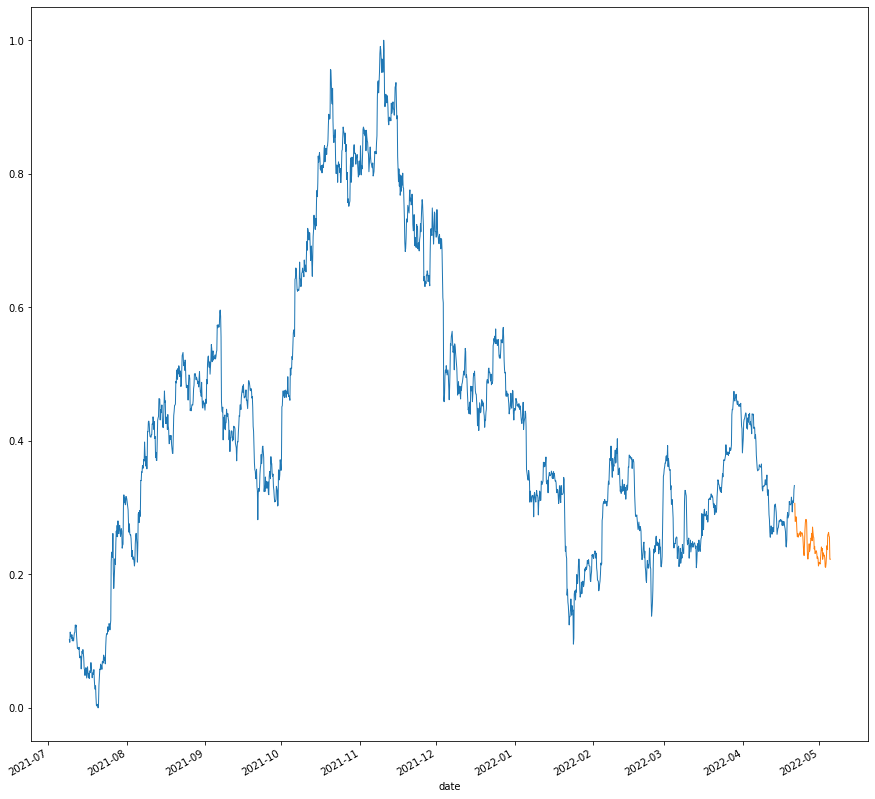

In [19]:
train_btc = dataframes_X_train_clas["BTCUSDT"]
test_btc = dataframes_X_test_clas["BTCUSDT"]

fig, ax = plt.subplots(figsize=(15,15))

train_btc.close.plot(ax=ax, label="train", linewidth=1)
test_btc.close.plot(ax=ax, label="test", linewidth=1)

### Clasificaciones

Definimos las entidades ModelEvaluation y Model para encpasular la lógica relacionada a entrenamiento, ajuste de hiperparámetros, predicciones y evaluación de modelos

In [20]:
class ModelEvaluation:
    def __init__(self, X_train, y_train, X_test, y_test, model, pair):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = model
        self.pair = pair

    def evaluate(self):
        print("\n")
        print(f"Evaluación del modelo {self.model.name} en el par {self.pair}")
        print("="*50)
        best_hyperparameters = self.model.get_best_hyperparameters(self.X_train, self.y_train)
        self.model.evaluate(
            best_hyperparameters,
            self.X_train,
            self.y_train,
            self.X_test,
            self.y_test,
        )
        print("="*50)
        print("\n")

    def predict(self, X):
        return self.model.predict(X)

class Model:
    def __init__(self, name, model, hyperparameters_grid, scoring, reporting):
        self.name = name
        self.model = model
        self.hyperparameters_grid = hyperparameters_grid
        self.scoring = scoring
        self.reporting = reporting

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, best_params, X_train, y_train, X_test, y_test):
        pred_classes = [1, 0]

        self.model.set_params(**best_params)

        self.model.fit(X_train, y_train)

        y_pred_test = self.model.predict(X_test)
        y_pred_train = self.model.predict(X_train)

        if(self.reporting):
            self.report_metrics(y_train, y_pred_train, pred_classes,
                            description="Conjunto de entrenamiento")

            self.report_metrics(y_test, y_pred_test, pred_classes, 
                            description="Conjunto de evaluación")

    def get_best_hyperparameters(self, X_train, y_train, cv=5):
        grid_cv = GridSearchCV(
            estimator= self.model,
            param_grid= self.hyperparameters_grid,
            cv=cv,
            scoring=self.scoring,
            n_jobs=5, 
            refit=True, 
            return_train_score=True, 
            verbose=1
        )
        grid_cv.fit(X_train, y_train)

        return  grid_cv.best_params_

    def get_best_hyperparameters(self, X_train, y_train, cv=5, print_values=False, print_results=True, print_best=True):
        grid_cv = GridSearchCV(
            estimator= self.model,
            param_grid= self.hyperparameters_grid,
            cv=cv,
            scoring=self.scoring,
            n_jobs=5, 
            refit=True, 
            return_train_score=True, 
            verbose=1
        )

        # Fit to the training data
        grid_cv.fit(X_train, y_train)

        best_params = grid_cv.best_params_

        if print_values:
        # Print the values used for hyperparameters
            print(f"""
            The values used for the hyperparameters:
            {grid_cv.cv_results_}
            """)

        if print_best:
        # Print best score and params
            print("\nMejor configuración:")
            display(pd.DataFrame([best_params]))
            print(f"\n{self.scoring} (mejor configuración) %.3f" % grid_cv.best_score_)

        if print_results:
            results = self.format_results(grid_cv.cv_results_, self.hyperparameters_grid)
            print("\nPerformance para todas las configuraciones "
            "(ordernadas en forma descendiente):")
            display(results)

        return best_params

    def format_results(self, results, params):
        results_df = pd.DataFrame(results)
        cols = ['param_' + param for param in params.keys()] 
        cols += ['mean_test_score', 'std_test_score']
        results_df = results_df[cols].sort_values(by='mean_test_score', 
                                                    ascending=False)
        results_df['variance'] = results_df['std_test_score']**2
        return results_df

    def report_metrics(self, y_true, y_predicted, cm_labels, description=None):
        if description:
            print(description)

        print("\tAccuracy (exactitud):  %.2f" % accuracy_score(y_true, y_predicted))
        print("\tPrecision (precisión):  %.2f" % precision_score(y_true, y_predicted))
        print("\tRecall (cobertura/exhaustividad):  %.2f" % 
                recall_score(y_true, y_predicted))
        print("\tF1:  %.2f" % f1_score(y_true, y_predicted))

        cm = confusion_matrix(y_true, y_predicted)
        
        self.plot_confusion_matrix(cm, cm_labels, 
                                title=f"Confusion matrix ({description})")          

    def plot_confusion_matrix(self, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.figure().clear()
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Etiqueta correcta')
        plt.xlabel('Etiqueta predicha')          

Creamos un array con las instancias de cada modelo de clasificación

In [21]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
hiperparams_decision_tree_classifier = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(4, 25, 4),
    'max_features': ['auto', 'log2', 'sqrt']
}

random_forest_classifier = RandomForestClassifier(random_state=0)
hiperparams_random_forest_classifier = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 25, 4),
    'n_estimators': np.arange(10, 100, 10),
    'max_features': ['log2', 'sqrt']
}

xg_boost = xgb.XGBClassifier(random_state=0)
hiperparams_xg_boost = {
    "learning_rate": np.linspace(0.1, 0.2, 3), 
    'max_depth': np.arange(4, 25, 4),
    'n_estimators': np.arange(10, 100, 10),
}


models_clas = [
    Model("DecisionTreeClassifier", decision_tree_classifier, hiperparams_decision_tree_classifier, "accuracy", True),
    Model("RandomForestClassifier", random_forest_classifier, hiperparams_random_forest_classifier, "accuracy", True),
    Model("XGBClassifier", xg_boost, hiperparams_xg_boost, "accuracy", True)
]

In [22]:
evaluation_models_clas = dict()

def add_evaluation_model(pair, models, evaluation_models, x_train_dict, y_train_dict, x_test_dict, y_test_dict):
    X_train = x_train_dict[pair]
    y_train = y_train_dict[pair]
    X_test = x_test_dict[pair]
    y_test = y_test_dict[pair]

    for model in models:
        evaluation_models[f"{pair}_{model.name}"] = (ModelEvaluation(X_train, y_train, X_test, y_test, model, pair))

do(add_evaluation_model, models_clas, evaluation_models_clas, dataframes_X_train_clas, dataframes_y_train_clas, dataframes_X_test_clas, dataframes_y_test_clas)


## Parte 2

### Preprocesamiento

Definimos la función `to_dataframe_pred` para convertir el dataframe en una estructura X-y,
1. La matriz `X` representan un conjunto de subseries de valores consecutivos de la serie.
2. El vector columna `y` representa el valor siguiente a la subserie. Es decir, si la subserie X[0] = [n0,n1,n2] entonces y[0]=n3

In [23]:
dataframes_pred = dict()
dataframes_y_pred = dict()

def to_dataframe_pred(pair, target="close", n_in=1, n_out=1):
    dataframe = dataframes[pair]
    data_tuned = pd.DataFrame(dataframe)
    columns, names = list(), list()

    for i in range(n_in, 0, -1):
        columns.append(data_tuned.shift(i))
        names += [f"{column}(t-{i})" for column in dataframe.columns]
    
    for i in range(0, n_out):
        columns.append(data_tuned[target].shift(-i))
        if i == 0:
            names += [f'{target}(t)']
        else:
            names += [f'{target}(t+{i})']
    
    data_aggregate = pd.concat(columns, axis=1)
    data_aggregate.columns = names

    data_aggregate.dropna(inplace = True)
    data_aggregate.index = data_aggregate.index.astype(np.int64)

    dataframes_y_pred[pair] = data_aggregate.iloc[:,-1:]
    dataframes_pred[pair] = data_aggregate.loc[:, data_aggregate.columns != f'{target}(t)']


In [24]:
do(to_dataframe_pred, "close", 5)

In [25]:
dataframes_pred["BTCUSDT"]

,open(t-5),high(t-5),low(t-5),close(t-5),volume(t-5),exchange_rate_open(t-5),exchange_rate_high(t-5),exchange_rate_low(t-5),exchange_rate_close(t-5),exchange_rate_volume(t-5),...,exchange_rate_close(t-1),exchange_rate_volume(t-1),moving_average_close(t-1),rsi(t-1),adx(t-1),macd(t-1),macd_signal(t-1),macd_hist(t-1),upperband(t-1),lowerband(t-1)
date,,,,,,,,,,,,,,,,,,,,,
1625889600000000000,0.085745,0.098582,0.087540,0.102146,0.187789,0.525007,0.474618,0.653290,0.615282,0.169130,...,0.532523,0.067442,0.063429,0.511381,0.171505,0.486841,0.449786,0.698335,0.059562,0.094474
1625904000000000000,0.102148,0.098938,0.105989,0.098212,0.089788,0.615813,0.400329,0.719733,0.497936,0.036126,...,0.492820,0.070078,0.063021,0.477007,0.151772,0.491963,0.456802,0.695887,0.055802,0.096381
1625918400000000000,0.098213,0.109239,0.104540,0.113546,0.093914,0.498363,0.447375,0.644219,0.607805,0.089941,...,0.548893,0.095813,0.062654,0.512178,0.131880,0.499990,0.464262,0.699756,0.057925,0.095796
1625932800000000000,0.113548,0.113374,0.113510,0.107158,0.101284,0.608331,0.417971,0.683038,0.484470,0.092742,...,0.469012,0.147256,0.062169,0.447467,0.123640,0.499895,0.470209,0.686564,0.058707,0.096339
1625947200000000000,0.107160,0.104382,0.109020,0.109324,0.079422,0.484886,0.356801,0.633052,0.532523,0.067442,...,0.546715,0.044170,0.061760,0.481503,0.124500,0.503449,0.475784,0.683327,0.058746,0.100537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651694400000000000,0.216232,0.219927,0.225983,0.227736,0.076972,0.549760,0.439996,0.676402,0.578034,0.126349,...,0.528310,0.022469,0.241564,0.678226,0.309560,0.550519,0.502867,0.742317,0.203170,0.237292
1651708800000000000,0.227738,0.236856,0.235361,0.242851,0.243002,0.578531,0.468851,0.680269,0.595262,0.260596,...,0.531611,0.051693,0.240849,0.690548,0.315795,0.567248,0.516592,0.754350,0.209022,0.234656
1651723200000000000,0.242852,0.238948,0.244620,0.237450,0.146301,0.595774,0.407174,0.679594,0.493903,0.046855,...,0.492639,0.048059,0.240084,0.635952,0.323213,0.575629,0.529501,0.747238,0.213115,0.235323


In [26]:
dataframes_y_pred["BTCUSDT"]

,close(t)
date,
1625889600000000000,0.104448
1625904000000000000,0.109496
1625918400000000000,0.100393
1625932800000000000,0.105035
1625947200000000000,0.101745
...,...
1651694400000000000,0.262883
1651708800000000000,0.257110
1651723200000000000,0.256192


Escalamos los dataframes

In [27]:
do(scale, dataframes_pred)

Separamos en train y test

In [28]:
dataframes_X_train_pred = dict()
dataframes_y_train_pred = dict()
dataframes_X_test_pred = dict()
dataframes_y_test_pred = dict()


def split_train_test_pred(pair):
    tss = TimeSeriesSplit(n_splits = 20)
    for train_index, test_index in tss.split(dataframes_pred[pair]):
        dataframes_X_train_pred[pair], dataframes_X_test_pred[pair] = dataframes_pred[pair].iloc[train_index, :], dataframes_pred[pair].iloc[test_index,:]
        dataframes_y_train_pred[pair], dataframes_y_test_pred[pair] = dataframes_y_pred[pair].iloc[train_index], dataframes_y_pred[pair].iloc[test_index]

do(split_train_test_pred)

<AxesSubplot:xlabel='date'>

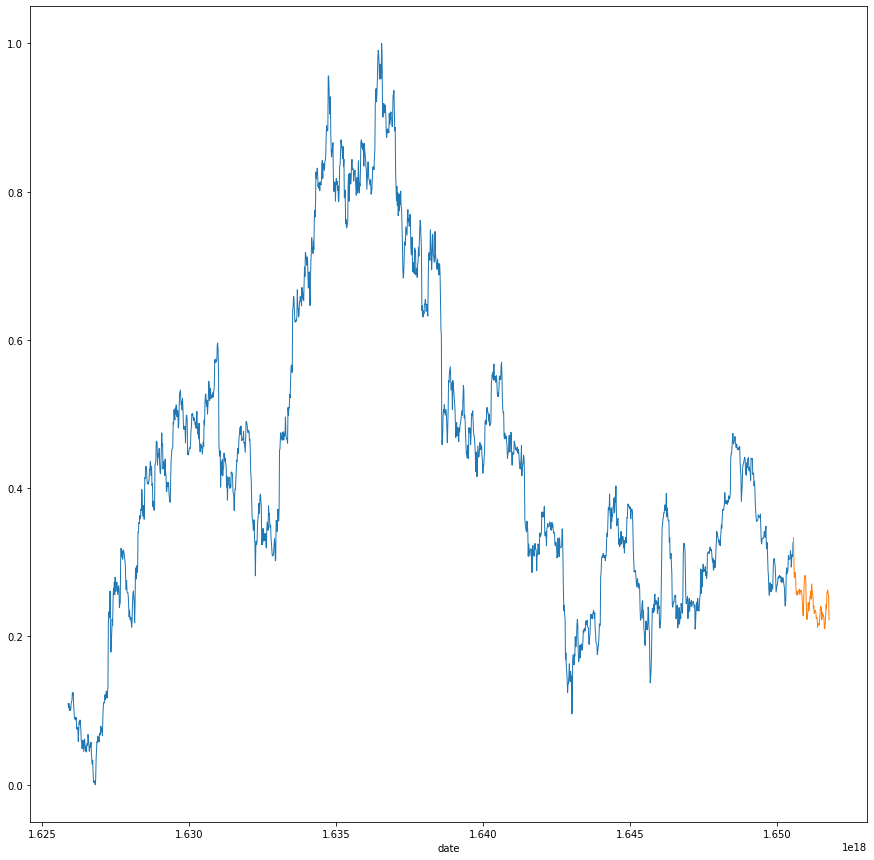

In [29]:
train_btc_pred = dataframes_X_train_pred["BTCUSDT"]
test_btc_pred = dataframes_X_test_pred["BTCUSDT"]

fig, ax = plt.subplots(figsize=(15,15))

train_btc_pred["close(t-1)"].plot(ax=ax, label="train", linewidth=1)
test_btc_pred["close(t-1)"].plot(ax=ax, label="test", linewidth=1)

### Predicciones

Creamos un array con las instancias de cada modelo de predicción

In [32]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
hiperparams_decision_tree_regressor = {
    "splitter":["best","random"],
    "max_depth" : [1,3,5,7,9,11,12],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}

xg_boost_regressor = xgb.XGBRegressor(random_state=0)
hiperparams_xg_boost_regressor = {
    'nthread':[4],
    'objective':['reg:linear'],
    'learning_rate': [.03, 0.05, .07],
    'max_depth': [5, 6, 7],
    'min_child_weight': [4],
    'silent': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [500]
}

models_pred = [
    Model("DecisionTreeRegressor", decision_tree_regressor, hiperparams_decision_tree_regressor, "neg_mean_squared_error", False),
    Model("XGBRegressor", xg_boost_regressor, hiperparams_xg_boost_regressor, "neg_mean_squared_error", False),
]

In [33]:
evaluation_models_pred = dict()
do(add_evaluation_model, models_pred, evaluation_models_pred, dataframes_X_train_pred, dataframes_y_train_pred, dataframes_X_test_pred, dataframes_y_test_pred)

In [34]:
evaluation_models_pred["BTCUSDT_DecisionTreeRegressor"].evaluate()



Evaluación del modelo DecisionTreeRegressor en el par BTCUSDT
Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Loca


Mejor configuración:


,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_weight_fraction_leaf,splitter
0,5,auto,None,1,0.1,best



neg_mean_squared_error (mejor configuración) -0.004

Performance para todas las configuraciones (ordernadas en forma descendiente):


,param_splitter,param_max_depth,param_min_samples_leaf,param_min_weight_fraction_leaf,param_max_features,param_max_leaf_nodes,mean_test_score,std_test_score,variance
36000,best,11,1,0.1,auto,None,-0.004236,0.002519,0.000006
48744,best,12,9,0.1,None,None,-0.004236,0.002519,0.000006
14472,best,5,5,0.1,auto,None,-0.004236,0.002519,0.000006
14454,best,5,4,0.1,auto,None,-0.004236,0.002519,0.000006
14436,best,5,3,0.1,auto,None,-0.004236,0.002519,0.000006
...,...,...,...,...,...,...,...,...,...
50395,random,12,10,0.7,None,90,NaN,NaN,NaN
50396,best,12,10,0.8,None,90,NaN,NaN,NaN
50397,random,12,10,0.8,None,90,NaN,NaN,NaN
50398,best,12,10,0.9,None,90,NaN,NaN,NaN


C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [37]:
class Serie:
    def __init__(self, name, values):
        self.name = name
        self.values = values

In [35]:
def plot_series(x, series):
    for serie in series:
        plt.plot(x, serie.values, label=serie.name)
    plt.legend(loc='best')
    plt.show()


def compare(real, predictions):
    predictions_df = real.copy()
    predictions_df["predicted_values"] = predictions
    real.rename(columns = {'close(t)':'real_values'}, inplace = True)
    fig, ax = plt.subplots(figsize=(15,15))
    predictions_df.plot(ax=ax, linewidth=1)
    real.plot(ax=ax, linewidth=1)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_17560\3968094705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real.rename(columns = {'close(t)':'real_values'}, inplace = True)


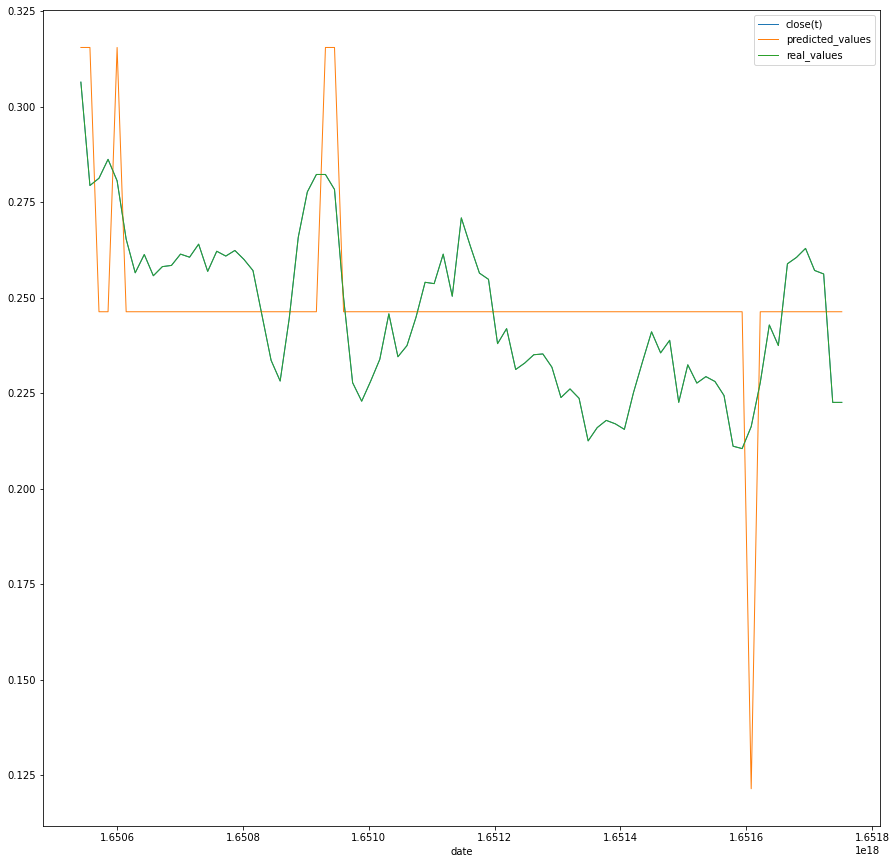

In [36]:
compare(dataframes_y_test_pred["BTCUSDT"], evaluation_models_pred["BTCUSDT_DecisionTreeRegressor"].predict(dataframes_X_test_pred["BTCUSDT"]) )